Zadanie 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, shapiro

In [2]:
def polar_box_muller(n, mi, sigma):
    sigmas = [sigma] * n
    mis = [mi] * n
    samples = []
    while len(samples) < n:
        u1, u2 = np.random.uniform(-1,1,2)
        v1, v2 = 2*u1 - 1, 2*u2 - 1
        w = v1**2 + v2**2
        if w < 1:
            y = np.sqrt(-2*np.log(w)/w)
            x1, x2 = v1 * y, v2 * y
            samples.append(x1)
            samples.append(x2)
    return np.add(np.multiply(samples,sigmas), mis)


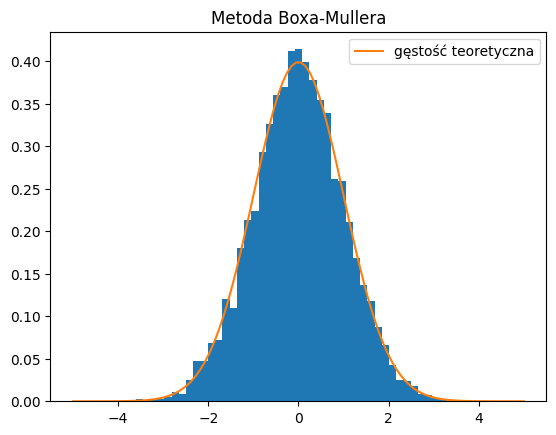

In [3]:
samples_bm = polar_box_muller(10000, 0 ,1)
xs = np.linspace(-5,5, 100)
plt.hist(samples_bm, density=True, bins=50)
plt.plot(xs, norm.pdf(xs, 0, 1), label="gęstość teoretyczna")
plt.title("Metoda Boxa-Mullera")
plt.legend(loc='best')
plt.show()

In [4]:
def polar_marsaglia(n, mi, sigma):
    sigmas = [sigma] * n
    mis = [mi] * n
    samples = []
    while len(samples) < n:
        y1, y2 = np.random.uniform(-1,1,2)
        r = y1**2 + y2**2
        if r < 1:
            y = np.sqrt(-2*np.log(r)/r)
            x1, x2 = y1 * y, y2 * y
            samples.append(x1)
            samples.append(x2)
    return np.add(np.multiply(samples,sigmas), mis)

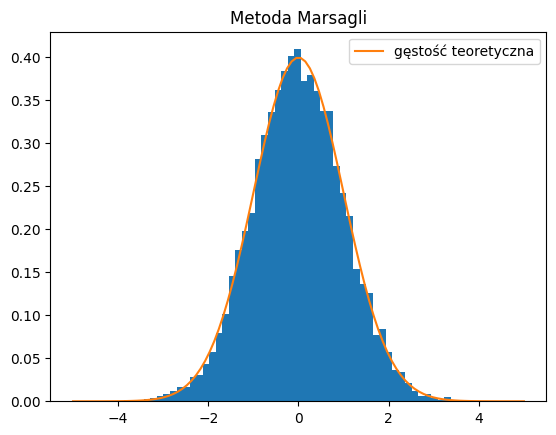

In [5]:
samples_mar = polar_marsaglia(10000, 0 ,1)
xs = np.linspace(-5,5, 100)
plt.hist(samples_mar, density=True, bins=50)
plt.plot(xs, norm.pdf(xs, 0, 1), label="gęstość teoretyczna")
plt.title("Metoda Marsagli")
plt.legend(loc='best')
plt.show()

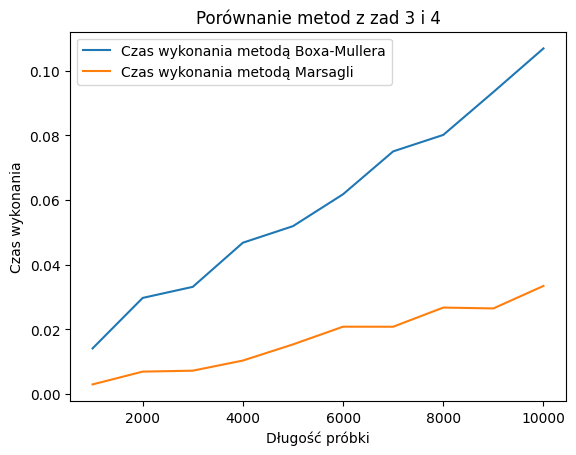

In [6]:
import time
ns = np.linspace(1000, 10000, 10)
times_bm = []
times_mar = []
for n in ns:
    start1 = time.time()
    polar_box_muller(int(n), 0, 1)
    end1 = time.time()
    times_bm.append(end1-start1)
    start2 = time.time()
    polar_marsaglia(int(n), 0, 1)
    end2 = time.time()
    times_mar.append(end2-start2)
plt.plot(ns, times_bm, label="Czas wykonania metodą Boxa-Mullera")
plt.plot(ns, times_mar, label="Czas wykonania metodą Marsagli")
plt.legend(loc="best")
plt.title("Porównanie metod z zad 3 i 4")
plt.xlabel("Długość próbki")
plt.ylabel("Czas wykonania")
plt.show()


In [19]:
test_samples_bm = polar_box_muller(500, 0, 1)
test_samples_mar = polar_marsaglia(500, 0, 1)
bm_shapiro = shapiro(test_samples_bm)
mar_shapiro = shapiro(test_samples_mar)
print(bm_shapiro, mar_shapiro)

ShapiroResult(statistic=0.9986255168914795, pvalue=0.9681545495986938) ShapiroResult(statistic=0.9960130453109741, pvalue=0.24019889533519745)


W obu przypadkach wartość pvalue jest większa niż 0.05, więc możemy potwierdzić hipotezę, że próbki pochodzą z rozkładu normalnego.

Zadanie 2 - macierze 3x3

In [3]:
cov1 = [[4,1, 0.5], [1,2, -0.3], [0.5, -0.3, 3]]
mean1 = [2, -1, 3]
sigma1 = np.matrix(cov1)
mi1 = np.matrix(mean1).reshape(3,1)

Szukamy macierzy dolnotrójkątnej $\textbf{A}$ takiej, że $\textbf{A}\textbf{A}^T = \Sigma$, za pomocą rozkładu Cholesky'ego.

In [4]:
A1 = np.linalg.cholesky(sigma1)


W drugim kroku generujemy $n$ wektorów trójwymiarowych $\textbf{Z}_i$, których składowe to niezależne zmienne losowe o standardowym rozkładzie normalnym.

In [5]:
n = 1000
Z = np.random.normal(loc = 0, scale = 1, size = 3 * n).reshape(3,n)

Aby otrzymać szukane wektory $\textbf{X}_i$ o rozkładzie dwuwymiarowym normalnym wystarczy wykonać przekształcenie
$$
\textbf{X}_i = \mu + \textbf{A}\textbf{Z}_i
$$

In [6]:
X = np.array((mi1 + np.dot(A1, Z)).reshape(n, 3))


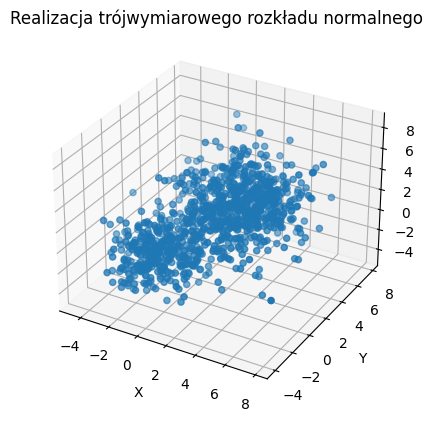

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title("Realizacja trójwymiarowego rozkładu normalnego")
plt.show()